In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yf
from datetime import datetime

# Importing the dataset

In [2]:
# Set the ticker symbol for Bank Nifty
ticker = "UBER"

# Download the data from Yahoo Finance for a specific date range
data = yf.download(ticker, start="2015-01-01", end=datetime.today())

[*********************100%***********************]  1 of 1 completed


In [3]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-10,42.000000,45.000000,41.060001,41.570000,41.570000,186322500
2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400
2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100
2019-05-15,39.369999,41.880001,38.950001,41.290001,41.290001,36086100
2019-05-16,41.480000,44.060001,41.250000,43.000000,43.000000,38115500
...,...,...,...,...,...,...
2023-05-02,35.020000,36.625000,34.230000,36.520000,36.520000,102993500
2023-05-03,36.750000,38.349998,36.349998,37.840000,37.840000,68580800
2023-05-04,37.480000,37.799999,36.685001,37.490002,37.490002,44819400


# Data Preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2019-05-10 to 2023-05-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1006 non-null   float64
 1   High       1006 non-null   float64
 2   Low        1006 non-null   float64
 3   Close      1006 non-null   float64
 4   Adj Close  1006 non-null   float64
 5   Volume     1006 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 55.0 KB


In [5]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-10,42.000000,45.000000,41.060001,41.570000,41.570000,186322500
2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400
2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100
2019-05-15,39.369999,41.880001,38.950001,41.290001,41.290001,36086100
2019-05-16,41.480000,44.060001,41.250000,43.000000,43.000000,38115500


In [6]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-02,35.02,36.625000,34.230000,36.520000,36.520000,102993500
2023-05-03,36.75,38.349998,36.349998,37.840000,37.840000,68580800
2023-05-04,37.48,37.799999,36.685001,37.490002,37.490002,44819400
2023-05-05,37.48,37.950001,36.869999,37.750000,37.750000,24676200
2023-05-08,37.82,38.930000,37.480000,38.830002,38.830002,30972500


In [7]:
data.shape

(1006, 6)

In [8]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1.006000e+03
mean,36.985183,37.738410,36.159881,36.950586,36.950586,2.552356e+07
std,9.580265,9.661187,9.424000,9.523264,9.523264,1.653404e+07
min,15.960000,17.799999,13.710000,14.820000,14.820000,3.380000e+06
25%,30.070000,30.602750,29.395000,30.080000,30.080000,1.573800e+07
50%,34.245001,34.950001,33.520000,34.275000,34.275000,2.177395e+07
75%,43.747500,44.349998,43.009998,43.619999,43.619999,3.039042e+07
max,63.250000,64.050003,60.799999,63.180000,63.180000,1.863225e+08


# Missing values

In [9]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
import plotly.express as px
import matplotlib.pyplot as plt

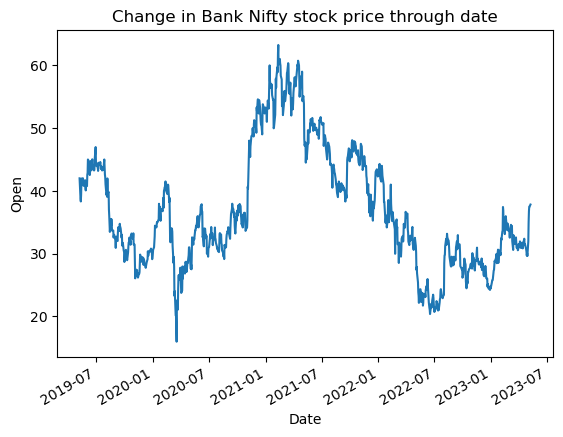

In [11]:

# plot price of gold for each increasing day
data["Open"].plot()
plt.title("Change in Bank Nifty stock price through date")
plt.xlabel("Date")
plt.ylabel("Open")
plt.show()

# Splitting X and Y into taining and testing varaibles

In [12]:
X=data[['Open','High','Low']]
y=data['Close']

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [14]:
X_train.shape,X_test.shape


((754, 3), (252, 3))

In [15]:
y_train.shape,y_test.shape

((754,), (252,))

# Random Forest

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [17]:
regressor = RandomForestRegressor(n_estimators=100)

In [18]:
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [19]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [20]:
print(test_data_prediction)

[42.92470093 55.8816     30.73230009 38.51710056 31.50720015 49.19119967
 29.03850002 30.6327001  31.57029947 30.08010008 35.77600079 27.49370001
 47.31329937 37.58180016 25.29909964 32.84310045 51.63839985 38.64230125
 27.83480021 26.5355999  34.90080048 31.13189989 33.92869984 30.08090021
 52.99249977 31.04970049 25.47619987 28.60319992 44.5169001  32.46799988
 29.81430004 38.25980057 36.09809952 21.60230038 29.7217001  36.56879955
 28.74549978 50.19500011 34.22190044 20.88170017 27.31189999 33.89790016
 44.42860001 47.08769958 34.34940037 34.14009972 25.93730003 32.54720013
 58.05330002 27.85420004 32.34860058 46.41939964 49.24883509 35.42560078
 58.98640007 25.52300001 22.65809975 36.72620064 37.80569984 49.09797495
 50.11929924 40.13059994 27.31150024 43.51569946 39.96219952 40.69179989
 30.68050014 28.67540024 53.59959892 29.21930035 24.7940995  32.71880013
 23.72060026 34.11329937 32.74949942 44.26610012 33.22690042 36.71860012
 37.03070007 39.60539997 43.06120022 35.51170021 36

In [21]:
# R squared errorY
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9960964311273532


In [22]:
y_test=list(y_test)

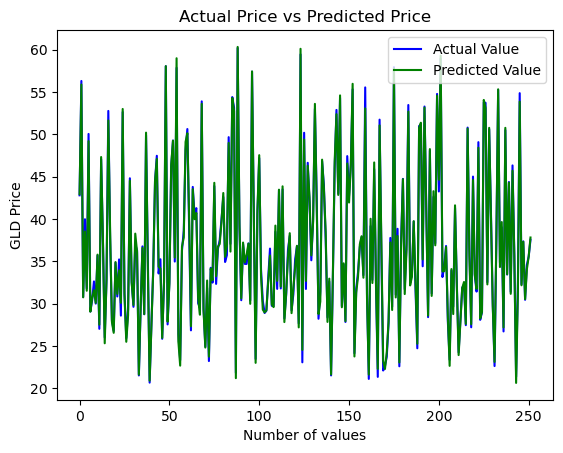

In [23]:
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

# Training the model using linear regression

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model=LinearRegression()


In [26]:
model.fit(X_train,y_train)

LinearRegression()

In [27]:
y_pred = model.predict(X_test)

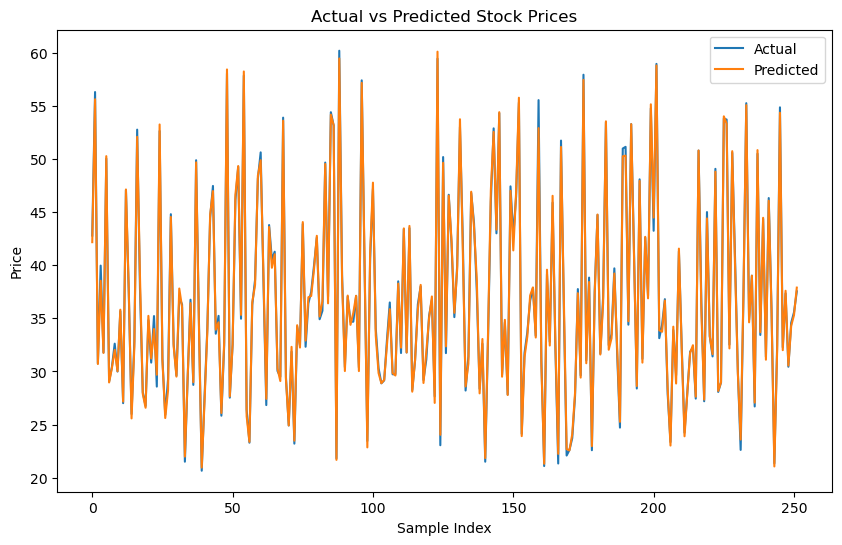

In [28]:
# Visualize the actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.show()

In [29]:
reg=LinearRegression()
reg.fit(X,y)

LinearRegression()

In [30]:
prediction=reg.predict(X)

In [31]:
prediction

array([43.71037615, 37.11432736, 38.53981569, ..., 37.11136936,
       37.37058212, 38.43323612])

In [32]:
Open=float(input("enter a value"))
High=float(input("enter a value"))
Low=float(input("enter a value"))

data = np.array([[Open,High,Low]])
pred_value = model.predict(data)[0]

print(pred_value)

enter a value324
enter a value343
enter a value324
338.43214340007523


C:\Users\reham\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [34]:
import pickle
file=open("UBER_model.pkl",'wb')
pickle.dump(model,file)